# Imports

In [1]:
# Module imports
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Load Data

In [2]:
rawdata = pd.read_csv('train_data.csv')
# display the top rows
rawdata.head(10)
# get a quick description of the data, including # of rows, # of features, name of each feature, type of each feature, # of non-null values
rawdata.info()
# show a summary of the numerical attributes
rawdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16174 entries, 0 to 16173
Columns: 2304 entries, 146 to 81.32
dtypes: int64(2304)
memory usage: 284.3 MB


,146,146.1,145,145.1,145.2,142,140,114,126,128,...,103.20,103.21,93.38,87.24,73.37,65.16,65.17,76.22,85.32,81.32
count,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,...,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000,16174.000000
mean,115.172561,112.329232,109.549091,107.333375,105.387536,103.965438,103.427476,103.592494,104.380735,105.953135,...,106.485285,106.291765,106.347595,106.390009,106.669593,107.128663,107.969952,109.206442,110.222889,111.104241
std,80.539533,79.213499,78.220335,76.684773,75.304486,73.672093,72.248025,70.990470,69.984102,69.203628,...,69.204445,70.515532,71.419785,72.296773,73.240775,74.198993,75.210664,76.162908,76.667146,77.251378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,42.000000,41.000000,41.000000,41.000000,41.000000,42.000000,43.000000,44.000000,46.000000,...,47.000000,45.000000,45.000000,44.000000,42.000000,42.000000,41.000000,41.000000,41.000000,42.000000
50%,103.000000,99.000000,95.000000,92.000000,90.000000,90.000000,90.000000,91.000000,94.000000,97.000000,...,100.000000,99.000000,98.000000,97.000000,97.000000,98.000000,98.000000,99.500000,101.000000,101.000000
75%,184.000000,178.000000,173.000000,167.000000,163.000000,159.000000,157.000000,156.000000,158.000000,159.000000,...,159.000000,160.000000,161.000000,163.000000,165.000000,167.000000,169.000000,172.000000,173.000000,175.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


#  Task 1: Preprocess Data

In [107]:
data = rawdata.drop(labels="Outcome", axis=1, inplace=False).astype(float)
target = rawdata["Outcome"].copy()

print(data.shape)
print(target.shape)

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

data_preprocessed = num_pipeline.fit_transform(data)
# data_preprocessed = rawdata.drop("Outcome", axis=1, inplace=False).astype(float)
target_preprocessed = target.values

(768, 8)
(768,)


# Task 2: Split Dataset for Training, Validation, and Testing

In [108]:
train_data, valid_data, train_target, valid_target = train_test_split(data_preprocessed, target_preprocessed, test_size = 0.20, random_state = 42)
train_data, test_data, train_target, test_target = train_test_split(train_data, train_target, test_size = 0.25, random_state = 42)

#print(train_data)
print(f"train_data.shape: {train_data.shape}")
print(f"train_target.shape: {train_target.shape}")
print()
print(f"valid_data.shape: {valid_data.shape}")
print(f"valid_target.shape: {valid_target.shape}")
print()
print(f"test_data.shape: {test_data.shape}")
print(f"test_target.shape: {test_target.shape}")

train_data.shape: (460, 8)
train_target.shape: (460,)

valid_data.shape: (154, 8)
valid_target.shape: (154,)

test_data.shape: (154, 8)
test_target.shape: (154,)


# Task 3: Use Logistic Regression using Scikit-learn

In [109]:


lr = LogisticRegression()
lr.fit(train_data, train_target)

print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
print()

print("training loss using sklearn - log_loss: %.2f" % (log_loss(train_target, lr.predict_proba(train_data))))
print("validation loss using sklearn - log_loss: %.2f" % (log_loss(valid_target, lr.predict_proba(valid_data))))
print("testing loss using sklearn - log_loss: %.2f" % (log_loss(test_target, lr.predict_proba(test_data))))

# Confusion Matrix to evaluate accuracy of classification
predictions = lr.predict(test_data)
confusion_matrix(test_target, predictions)

# Accuracy Classification Score
print(accuracy_score(test_target, predictions))

# Main Classification Metrics
print(classification_report(test_target, predictions))



Coefficients: 
 [[ 0.18573298  0.89248159 -0.36580058  0.1072025  -0.15000066  0.78462133
   0.18463707  0.56223892]]
Intercept: 
 [-0.87631239]

training loss using sklearn - log_loss: 0.48
validation loss using sklearn - log_loss: 0.53
testing loss using sklearn - log_loss: 0.45
0.7792207792207793
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       101
           1       0.81      0.47      0.60        53

    accuracy                           0.78       154
   macro avg       0.79      0.71      0.72       154
weighted avg       0.78      0.78      0.76       154



# Task 4: Implement stochastic gradient descent method to perform logistic regression

training loss using SGD method: 0.48
validation loss using SGD method: 0.53
testing loss using SGD method: 0.46
Coefficients:
[ 0.16702005  0.88067341 -0.32265467  0.14815722 -0.1405555   0.69628751
  0.16779133  0.56452311]
Intercept:
-0.8402341371750234



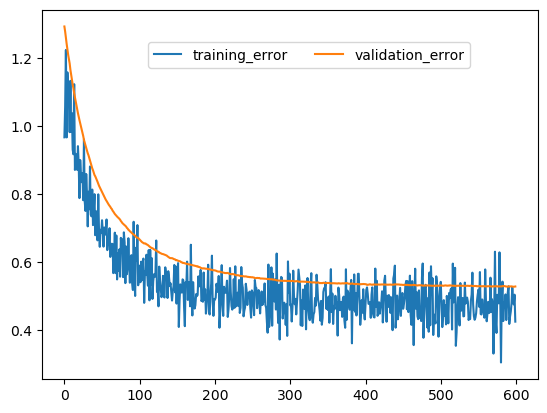

In [110]:
#Param Setting
#np.random.seed(0)  #Seed 0 will give exactly train 0.48, valid 0.52, test 0.44 score
epochs = 100
batch_size = 70
w = np.random.normal(0, 0.5, (train_data.shape[1] + 1))
#w = np.zeros(train_data.shape[1])
learning_rate = 0.05

# Sigmoid = 1 / (1 + e^-z) where z = Xw
def sigmoid(X, w):
    return 1 / (1 + np.exp(-np.dot(X, w)))

#-1/N * Sum [t log(o) + (1-t)log(1-o)]
# where o = sigmoid(X, w)
def logistic_loss_function(X, w, y):    #test, coeff, true
    sigma = sigmoid(X, w)
    loss = -np.mean(y * np.log(sigma) + (1 - y) * np.log(1 - sigma))
    return loss

# Data Handling (Including Intercept, # batches calculation, loss history)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)
batches = epochs * ((int)(train_data.shape[0] / batch_size))
train_losses = np.zeros((batches, 1))
valid_losses = np.zeros((batches, 1))
current_batch = 0

for i in range(epochs):
    shuffle_indicies = np.random.permutation(len(train_data))
    rng_train_data, rng_train_target = shuffle(train_data_intercept, train_target)
    
    for j in range(0, rng_train_data.shape[0], batch_size):
        k = j + batch_size
        if k > train_data_intercept.shape[0]:
            break
        batched_train_data = rng_train_data[j:k]
        batched_train_target = rng_train_target[j:k]
        
        # Gradient
        # (-1/m)X^T (t-o(Xw))
        grad = (-1 / batch_size) * np.dot(batched_train_data.T, (batched_train_target - sigmoid(batched_train_data, w)))
        
        w = w + learning_rate * (-1 * grad)
        #print(grad)
        train_losses[current_batch] = logistic_loss_function(batched_train_data, w, batched_train_target)
        
        #Okay not to batch validation here... in real practice -> do batch validation
        valid_losses[current_batch] = logistic_loss_function(valid_data_intercept, w, valid_target)
        current_batch += 1

intercept = w[0]
coeff = w[1:]

print("training loss using SGD method: %.2f" % (logistic_loss_function(train_data_intercept, w, train_target)))
print("validation loss using SGD method: %.2f" % (logistic_loss_function(valid_data_intercept, w, valid_target)))
print("testing loss using SGD method: %.2f" % (logistic_loss_function(test_data_intercept, w, test_target)))
print("Coefficients:")
print(coeff)
print("Intercept:")
print(intercept)

plt.plot(np.arange(batches), train_losses, label = "training_error")
plt.plot(np.arange(batches), valid_losses, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

# print(np.argmin(valid_losses))
# print(np.min(valid_losses))
